In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from bandit.utils.processing import generate_vw_input

In [8]:
user_feedback = pd.read_csv("../data/user_feedback.csv")
user_feedback = user_feedback[user_feedback["country_code"] == "UK"].sort_values(by="timestamp")   

user_feedback.head(3)

,user_id,model_id,country_code,timestamp,feedback
230,U0003,61e8c5ad9,UK,2025-11-12 00:06:06,1
198,U0061,e1068b63a,UK,2025-11-12 00:19:29,1
150,U0002,61e8c5ad9,UK,2025-11-12 00:21:10,1


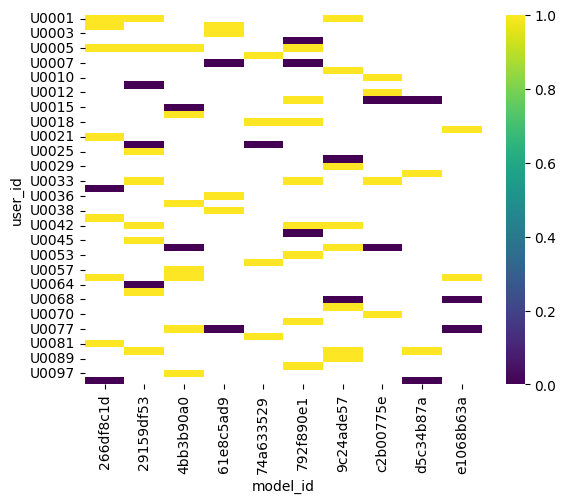

In [9]:
# check the distrubution of feedback
feedback = user_feedback[['user_id', 'model_id', 'feedback']]

sns.heatmap(feedback.pivot(index='user_id', columns='model_id', values='feedback'), cmap='viridis')
plt.show()

In [10]:
model_features = pd.read_csv("../data/model_features.csv")
model_features = model_features[model_features["country_code"] == "UK"]

model_features.head(3)

,model_name,model_type,variant_id,version,model_id,country_code,MAE,RMSE,HR,cHR,MRR,Coverage,Precision@K,Recall@K,F1@K
0,LeadFinder,content-based,V0001,1.0.0,266df8c1d,UK,0.697,0.903,0.031,0.024,0.011,0.955,0.450,0.562,0.557
4,LeadFinder,collaborative,V0002,1.0.1,61e8c5ad9,UK,0.512,0.640,0.058,0.081,0.020,0.921,0.387,0.612,0.476
8,LeadFinder,hybrid,V0003,1.0.2,792f890e1,UK,0.601,0.792,0.072,0.066,0.028,0.946,0.421,0.644,0.506


In [11]:
output = generate_vw_input(user_feedback, model_features)

with open("../data/vw_input.txt", "w") as f:
    f.write(output)